# Final Project: Anthony Mu
DS 4420 Prof. Anthony

April 21, 2023

Adapted from the [image classification tutorial on kaggle](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data)  

and a [tutorial on how to develop a CNN](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

More information in the pdf report attached in submission!

In [2]:
!pwd

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd drive/MyDrive/ML2_data

/content/drive/MyDrive/ML2_data


In [6]:
!ls

dataset_dogs_vs_cats	 dogs_vs_cats_photos.npy	 my_model.h5  train
dogs_vs_cats_labels.npy  ipykernel_launcher.py_plot.png  test1


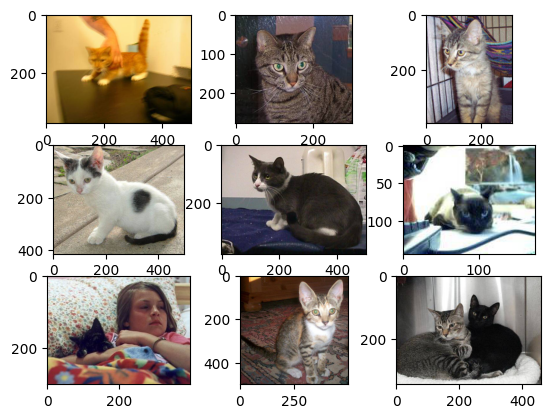

In [ ]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # define filename
  filename = folder + 'cat.' + str(i) + '.jpg'
  # load image pixels
  image = imread(filename)
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
!unzip train/train.zip

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
 # create label subdirectories
 labeldirs = ['dogs/', 'cats/']
 for labldir in labeldirs:
   newdir = dataset_home + subdir + labldir
   makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = 'train/'
 if random() < val_ratio:
   dst_dir = 'test/'
 if file.startswith('cat'):
   dst = dataset_home + dst_dir + 'cats/'  + file
   copyfile(src, dst)
 elif file.startswith('dog'):
  dst = dataset_home + dst_dir + 'dogs/'  + file
  copyfile(src, dst)

In [10]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 # fit model
 history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
 # evaluate model
 _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)
 model.save('my_model.h5') # Save the entire model to a file
 
# entry point, run the test harness
run_test_harness()

Found 18691 images belonging to 2 classes.
Found 6297 images belonging to 2 classes.


<ipython-input-10-2cc31225bd95>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
<ipython-input-10-2cc31225bd95>:58: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 69.192


In [7]:
# Load the saved model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('my_model.h5')


In [28]:
from matplotlib.image import imread
import numpy as np

# INTERACTIVE PORTION: load an image into the file system on which this notebook resides
# adjust the directory and filename below
# Run this cell, the model will classify your image!
folder = 'dataset_dogs_vs_cats/test/cats/'
filename = folder + 'cat.2.jpg'
image = imread(filename)
image.resize((200, 200, 3))
q = loaded_model.predict( np.array( [image,] )  )
if q[0][0] == 1:
  print("CAT")
else:
  print("DOG")

1/1 [==============================] - 0s 58ms/step
CAT


In [ ]:
()